In [7]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Create a set of random latitudes and longitutde combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


80.95279758643929 47.84329749955876
-15.709450077143515 -52.7843079043399
-13.672088509213182 74.20570970241786
-54.62955757801026 -141.801545360695
-70.70426336264453 -151.73799530720683
-89.9594721358593 -144.7389014274586
32.470662217682744 160.4622747316347
40.04729672193608 -172.20529787617517
-30.67555569821019 51.38613197170167
81.7368004777014 127.9157004532064
-29.856272203088217 -94.37371638311686
-65.45184881803496 -13.335199640751654
35.94046588712581 -25.998327920773022
-81.54555945013934 -40.72813746967165
21.200931281240287 125.07459989749043
-14.272220329995363 75.69807287470658
-28.309896539197346 8.159626952791058
-64.64589995816115 -177.61031847506766
-57.97444836459617 -120.17561879531078
-48.33477818762286 -40.23759908292149
-19.44813686019657 14.198283282428122
36.9613765598357 -65.35423127766339
-64.54838700183706 0.32124141863894806
22.98550406693377 98.87512380918128
-29.94253445388216 -171.3140965058103
-29.70869842023984 -71.45589540581986
62.73843002549634 1

82.39584096995154 -153.5932072914402
9.17002970996451 28.295358730775888
-45.86304531865181 -56.62647201059232
53.81965748398014 104.7067735565019
-66.25385695237578 0.08199612613495333
-28.29595402842945 44.68724381644418
-59.11881695441474 85.6089902536616
67.20742305948929 -97.19558194094917
28.337614676039934 88.17280953799286
-14.160292347463539 -135.08374650212886
61.74668028175972 -171.1263235111598
45.255076413253846 49.92393878723439
-18.982275379457434 -179.70436391540434
63.01222440931343 -19.999400308319764
52.206574689676074 -26.232360234790036
-71.11694012503938 -151.25906426915392
-18.910295002700167 -174.56830940228917
87.81356641740322 69.77279779945033
-22.926509047849464 -54.461648169164846
17.046109183876723 -39.61315128746685
-87.75584676210538 95.2192271404951
12.055433092893551 19.694059964038217
41.15953481413371 -131.52462106647806
73.53434453222846 -60.25345690945184
-23.37340784612654 -57.931998951584035
-69.4379591756994 89.92760046449655
-14.629062998373897

In [11]:
# Import the citipy module
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
# print(cities)
len(cities)

605

In [13]:
# Import the requests library
import requests

#Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | barra do garcas
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | ponta delgada
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | basco
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | khorixas
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | lashio
Processing Record 21 of Set 1 | coquimbo
P

Processing Record 36 of Set 4 | torbay
Processing Record 37 of Set 4 | krasnoselkup
Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | dublin
Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | atbasar
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | marsh harbour
Processing Record 46 of Set 4 | natal
Processing Record 47 of Set 4 | toliary
City not found. Skipping...
Processing Record 48 of Set 4 | el tigre
Processing Record 49 of Set 4 | matagami
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | gaogou
Processing Record 2 of Set 5 | rocha
Processing Record 3 of Set 5 | kaeo
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | mahebourg
Processing Record 6 of Set 5 | marawi
Processing Record 7 of Set 5 | tias
Processing Record 8 of Set 5 | kodiak
Processing Record 9 of Set 5 | chapayevka
Proc

Processing Record 24 of Set 8 | mokshan
Processing Record 25 of Set 8 | salalah
Processing Record 26 of Set 8 | robertsport
Processing Record 27 of Set 8 | san rafael
Processing Record 28 of Set 8 | juifang
City not found. Skipping...
Processing Record 29 of Set 8 | belomorsk
Processing Record 30 of Set 8 | santa rita
Processing Record 31 of Set 8 | grand gaube
Processing Record 32 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 33 of Set 8 | katsuura
Processing Record 34 of Set 8 | fuerte olimpo
Processing Record 35 of Set 8 | ahipara
Processing Record 36 of Set 8 | ostersund
Processing Record 37 of Set 8 | olafsvik
Processing Record 38 of Set 8 | kutum
Processing Record 39 of Set 8 | bosaso
Processing Record 40 of Set 8 | ketchikan
Processing Record 41 of Set 8 | warwick
Processing Record 42 of Set 8 | hami
Processing Record 43 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 8 | haapiti
Processing Record 45 of Set 8 | asau
Processing Record 46 of Se

Processing Record 11 of Set 12 | yanam
Processing Record 12 of Set 12 | karabulak
Processing Record 13 of Set 12 | avila
Processing Record 14 of Set 12 | port-gentil
Processing Record 15 of Set 12 | carutapera
Processing Record 16 of Set 12 | iskateley
Processing Record 17 of Set 12 | turukhansk
Processing Record 18 of Set 12 | south river
Processing Record 19 of Set 12 | ituni
City not found. Skipping...
Processing Record 20 of Set 12 | chipiona
Processing Record 21 of Set 12 | chimoio
Processing Record 22 of Set 12 | tacuati
Processing Record 23 of Set 12 | impfondo
Processing Record 24 of Set 12 | los llanos de aridane
Processing Record 25 of Set 12 | srednekolymsk
Processing Record 26 of Set 12 | ternate
Processing Record 27 of Set 12 | katsina
Processing Record 28 of Set 12 | manado
Processing Record 29 of Set 12 | cairns
Processing Record 30 of Set 12 | rongcheng
Processing Record 31 of Set 12 | verkh-chebula
Processing Record 32 of Set 12 | champerico
Processing Record 33 of Set

In [17]:
# Convery the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barra Do Garcas,-15.8900,-52.2567,81.18,57,0,5.75,BR,2022-08-09 22:48:58
1,Hithadhoo,-0.6000,73.0833,81.21,77,32,5.84,MV,2022-08-09 22:48:59
2,Mataura,-46.1927,168.8643,37.47,67,9,3.11,NZ,2022-08-09 22:48:59
3,Kapaa,22.0752,-159.3190,84.18,70,40,11.50,US,2022-08-09 22:45:35
4,Tiksi,71.6872,128.8694,57.47,72,66,14.76,RU,2022-08-09 22:49:00
5,Lebu,-37.6167,-73.6500,48.18,79,100,10.33,CL,2022-08-09 22:49:00
6,Cape Town,-33.9258,18.4232,57.11,88,75,12.66,ZA,2022-08-09 22:49:00
7,Ponta Delgada,37.7333,-25.6667,73.51,78,20,4.61,PT,2022-08-09 22:49:01
8,Ushuaia,-54.8000,-68.3000,35.26,80,0,1.14,AR,2022-08-09 22:48:06
9,Basco,20.4487,121.9702,84.04,73,100,8.03,PH,2022-08-09 22:49:01


In [18]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                   "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barra Do Garcas,BR,2022-08-09 22:48:58,-15.8900,-52.2567,81.18,57,0,5.75
1,Hithadhoo,MV,2022-08-09 22:48:59,-0.6000,73.0833,81.21,77,32,5.84
2,Mataura,NZ,2022-08-09 22:48:59,-46.1927,168.8643,37.47,67,9,3.11
3,Kapaa,US,2022-08-09 22:45:35,22.0752,-159.3190,84.18,70,40,11.50
4,Tiksi,RU,2022-08-09 22:49:00,71.6872,128.8694,57.47,72,66,14.76
5,Lebu,CL,2022-08-09 22:49:00,-37.6167,-73.6500,48.18,79,100,10.33
6,Cape Town,ZA,2022-08-09 22:49:00,-33.9258,18.4232,57.11,88,75,12.66
7,Ponta Delgada,PT,2022-08-09 22:49:01,37.7333,-25.6667,73.51,78,20,4.61
8,Ushuaia,AR,2022-08-09 22:48:06,-54.8000,-68.3000,35.26,80,0,1.14
9,Basco,PH,2022-08-09 22:49:01,20.4487,121.9702,84.04,73,100,8.03


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City ID")

In [20]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

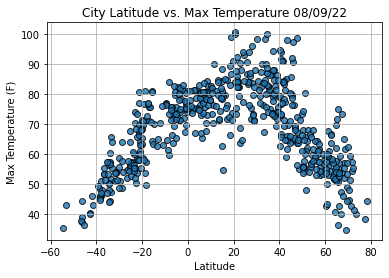

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

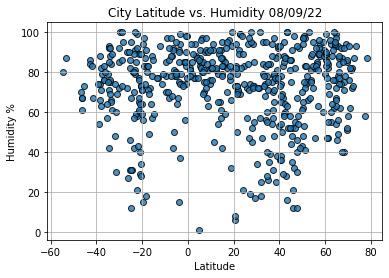

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

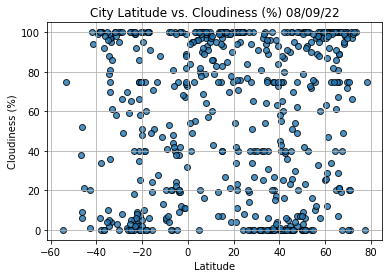

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

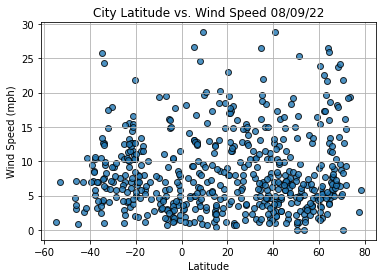

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()